In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset has columns as belows. Other columns are dropped out.

WAR	AB	R	HR	TB	RBI	BB	IB	SF	AVG	OBP	SLG	OPS	wRC+

And there are also only AB>30 samples to exclude meaningless data.

In [31]:
df = pd.read_csv('/content/sample_data/KBO increased data_over 30 AB.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WAR     191 non-null    float64
 1   AB      191 non-null    int64  
 2   R       191 non-null    int64  
 3   HR      191 non-null    int64  
 4   TB      191 non-null    int64  
 5   RBI     191 non-null    int64  
 6   BB      191 non-null    int64  
 7   IB      191 non-null    int64  
 8   SF      191 non-null    int64  
 9   AVG     191 non-null    float64
 10  OBP     191 non-null    float64
 11  SLG     191 non-null    float64
 12  OPS     191 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 19.5 KB


In [33]:
df.describe()

,WAR,AB,R,HR,TB,RBI,BB,IB,SF,AVG,OBP,SLG,OPS
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.00000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,1.083927,256.136126,39.209424,7.439791,108.481675,37.759162,26.86911,0.780105,2.722513,0.257393,0.332539,0.378440,0.710979
std,1.680480,168.155418,29.496799,9.015501,86.204032,32.460091,20.60630,1.550491,2.779903,0.053694,0.053478,0.104888,0.146777
min,-1.350000,31.000000,1.000000,0.000000,4.000000,0.000000,1.00000,0.000000,0.000000,0.088000,0.154000,0.125000,0.289000
25%,-0.170000,101.500000,13.000000,1.000000,34.500000,10.000000,9.50000,0.000000,0.000000,0.231500,0.301000,0.307000,0.609500
50%,0.510000,234.000000,33.000000,4.000000,87.000000,30.000000,21.00000,0.000000,2.000000,0.264000,0.339000,0.383000,0.732000
75%,1.975000,406.000000,60.000000,10.500000,182.000000,58.500000,44.50000,1.000000,4.000000,0.294000,0.369000,0.448000,0.805500
max,8.320000,574.000000,143.000000,46.000000,352.000000,132.000000,96.00000,9.000000,13.000000,0.360000,0.447000,0.660000,1.080000


In [34]:
corr_matrix = df.corr()
corr_matrix["WAR"].sort_values(ascending=False)

,WAR
WAR,1.000000
R,0.856051
TB,0.842795
RBI,0.793387
BB,0.792048
AB,0.772725
OPS,0.747921
SLG,0.693797
OBP,0.692001
HR,0.681543


array([[<Axes: title={'center': 'WAR'}>, <Axes: title={'center': 'AB'}>,
        <Axes: title={'center': 'R'}>, <Axes: title={'center': 'HR'}>],
       [<Axes: title={'center': 'TB'}>, <Axes: title={'center': 'RBI'}>,
        <Axes: title={'center': 'BB'}>, <Axes: title={'center': 'IB'}>],
       [<Axes: title={'center': 'SF'}>, <Axes: title={'center': 'AVG'}>,
        <Axes: title={'center': 'OBP'}>, <Axes: title={'center': 'SLG'}>],
       [<Axes: title={'center': 'OPS'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

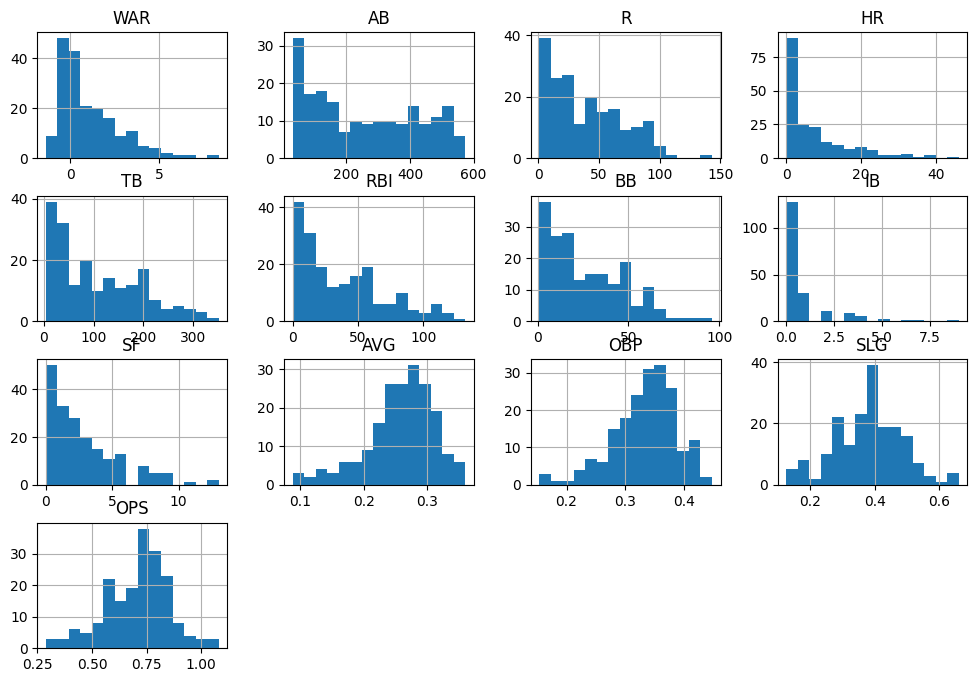

In [35]:
df.hist(bins=15, figsize=(12, 8))

Use R, RBI, TB for prediction

In [38]:
# change 0 to 1
cols_to_process = ['R', 'HR', 'TB', 'RBI', 'BB', 'IB', 'SF']
df[cols_to_process] = df[cols_to_process].apply(lambda col: np.where(col <= 0, 1, col))

In [40]:
df['HR']

,HR
0,3.637586
1,3.258097
2,1.609438
3,2.197225
4,2.197225
...,...
186,1.000000
187,1.000000
188,1.000000
189,1.000000


In [41]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
for col in ['R', 'HR', 'TB', 'RBI', 'BB', 'IB', 'SF']:
    df[col] = log_transformer.fit_transform(df[col])

In [42]:
df['HR']

,HR
0,1.291320
1,1.181143
2,0.475885
3,0.787195
4,0.787195
...,...
186,0.000000
187,0.000000
188,0.000000
189,0.000000


array([[<Axes: title={'center': 'WAR'}>, <Axes: title={'center': 'AB'}>,
        <Axes: title={'center': 'R'}>, <Axes: title={'center': 'HR'}>],
       [<Axes: title={'center': 'TB'}>, <Axes: title={'center': 'RBI'}>,
        <Axes: title={'center': 'BB'}>, <Axes: title={'center': 'IB'}>],
       [<Axes: title={'center': 'SF'}>, <Axes: title={'center': 'AVG'}>,
        <Axes: title={'center': 'OBP'}>, <Axes: title={'center': 'SLG'}>],
       [<Axes: title={'center': 'OPS'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

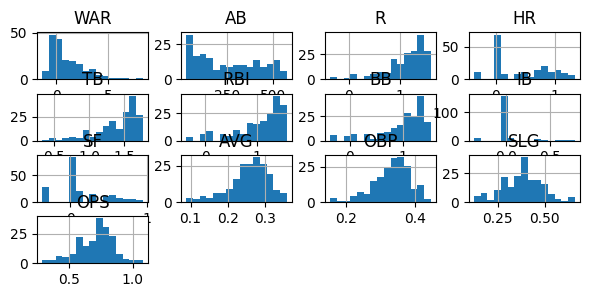

In [43]:
df.hist(bins=15, figsize=(7, 3))

In [45]:
# add 1.351 to WAR (to make all value > 0)
df["WAR"] = df["WAR"] + 1.351
df["WAR"].describe()

,WAR
count,191.000000
mean,2.434927
std,1.680480
min,0.001000
25%,1.181000
50%,1.861000
75%,3.326000
max,9.671000


<Axes: >

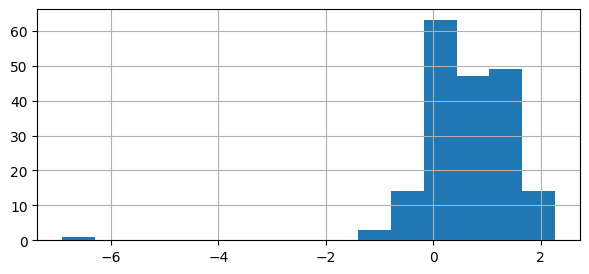

In [46]:
df["WAR"] = log_transformer.fit_transform(df["WAR"])
df["WAR"].hist(bins=15, figsize=(7, 3))

In [47]:
df.head()

,WAR,AB,R,HR,TB,RBI,BB,IB,SF,AVG,OBP,SLG,OPS
0,2.269132,544,1.601979,1.291320,1.768769,1.545720,1.432618,0.665730,0.665730,0.347,0.420,0.647,1.067
1,1.562556,552,1.508908,1.181143,1.732096,1.520544,1.311994,0.326634,0.475885,0.310,0.359,0.516,0.875
2,1.418520,515,1.493881,0.475885,1.666443,1.413636,1.353565,0.000000,0.583198,0.307,0.363,0.386,0.749
3,1.316676,423,1.353565,0.787195,1.656655,1.397000,1.224128,0.000000,0.000000,0.329,0.380,0.447,0.827
4,1.258745,438,1.462674,0.787195,1.651527,1.392612,1.364055,0.000000,0.475885,0.292,0.371,0.420,0.791


In [48]:
df.to_csv('/content/sample_data/final_df.csv')